# Практикум №5.

### Задание 1. Линейная регрессия.

In [47]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 100)

In [3]:
df_bad = pd.read_excel('Стат205214.xls', sheet_name='Линейная регрессия')

In [4]:
df_bad

,Содержание вещества,Аналитический сигнал,Анализируемый раствор,Изучается зависимость аналитического сигнала (B) от содержания вещества (A).,Unnamed: 4
0,0.1,1.45,9.36,"Построить градуировочный график, включая форму...",NaN
1,0.2,2.56,NaN,Оценить содержание вещества по величине сигнал...,NaN
2,0.3,3.66,NaN,NaN,NaN
3,0.4,4.77,NaN,NaN,NaN
4,0.5,5.87,NaN,NaN,NaN
5,0.6,6.97,NaN,NaN,NaN
6,0.7,8.06,NaN,NaN,NaN
7,0.8,9.15,NaN,NaN,NaN
8,0.9,10.24,NaN,NaN,NaN
9,1,11.32,NaN,NaN,NaN


Выделим датафрейм для первого задания:

In [5]:
df1 = df_bad.iloc[:10, :3]
df1 = df1.astype('float64')
df1

,Содержание вещества,Аналитический сигнал,Анализируемый раствор
0,0.1,1.45,9.36
1,0.2,2.56,NaN
2,0.3,3.66,NaN
3,0.4,4.77,NaN
4,0.5,5.87,NaN
5,0.6,6.97,NaN
6,0.7,8.06,NaN
7,0.8,9.15,NaN
8,0.9,10.24,NaN
9,1.0,11.32,NaN


In [6]:
def regression(x, y):
    z = np.polyfit(x, y, 1)
    linear_equation = np.poly1d(z)
    s = (df1['Анализируемый раствор'][0] - z[1])/z[0]
    print(linear_equation)
    print('Содержание вещества:', s)
    plt.scatter(x,y, color = 'red')
    plt.plot(x, linear_equation(x), color = 'black')
    plt.title(linear_equation)
    plt.grid()

 
10.97 x + 0.3713
Содержание вещества: 0.8193635710734215
Величина аналитического сигнала: 9.36


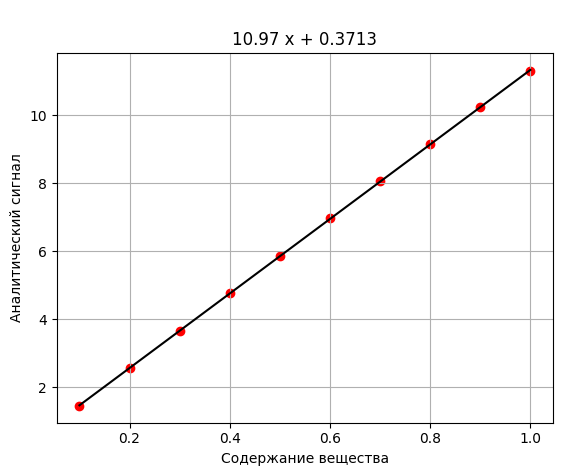

In [7]:
regression(df1['Содержание вещества'], df1['Аналитический сигнал'])
plt.xlabel('Содержание вещества')
plt.ylabel('Аналитический сигнал')
print('Величина аналитического сигнала:', df1['Анализируемый раствор'][0])

Также при помощи библиотеки `sklearn.linear_model`

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
contain = df1['Содержание вещества'].values.reshape(-1,1)
signal = df1['Аналитический сигнал'].values

In [11]:
model.fit(contain, signal)

LinearRegression()

In [12]:
sample = np.array([0.05, 1.1]).reshape(-1,1)

In [13]:
pred = model.predict(sample)

In [14]:
print(model.coef_)
print(model.intercept_)
print(pred)

[10.97030303]
0.37133333333333507
[ 0.91984848 12.43866667]


 
10.97 x + 0.3713
Содержание вещества: 0.8193635710734215


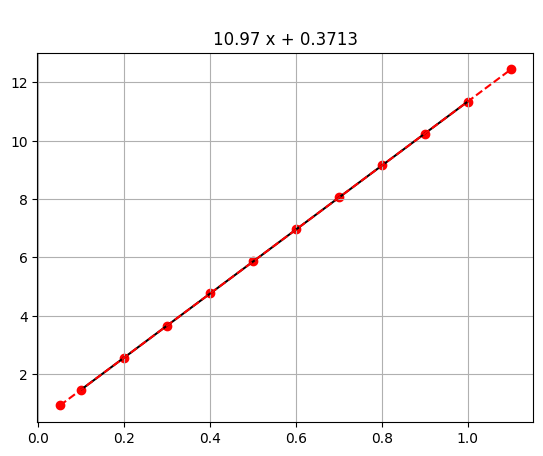

In [15]:
regression(df1['Содержание вещества'], df1['Аналитический сигнал'])
plt.plot([0.05, 1.1], pred, 'ro--')

In [16]:
from sklearn.metrics import r2_score

In [17]:
R2 = r2_score(y_true = signal, y_pred=model.predict(contain))
print(R2)

0.9999846666222597


### Задание 2. Нам даны значения аналитических сигналов, полученных разными методами. Нам нужно проверить, что нет систематической ошибки.

In [18]:
df2 = df_bad.iloc[10:21, 0:2]

In [19]:
df2

,Содержание вещества,Аналитический сигнал
10,Метод A,Метод B
11,0.1,0.1
12,0.2,0.19
13,0.3,0.36
14,0.4,0.45
15,0.5,0.51
16,0.6,0.68
17,0.7,0.76
18,0.8,0.89
19,0.9,0.99


In [20]:
new_Header = df2.iloc[0]
df2 = df2.iloc[1:]
df2.columns = new_Header
df2 = df2.astype('float64')
df2.head()

10,Метод A,Метод B
11,0.1,0.10
12,0.2,0.19
13,0.3,0.36
14,0.4,0.45
15,0.5,0.51


 
1.09 x - 0.0006667


Text(0, 0.5, 'Метод Б')

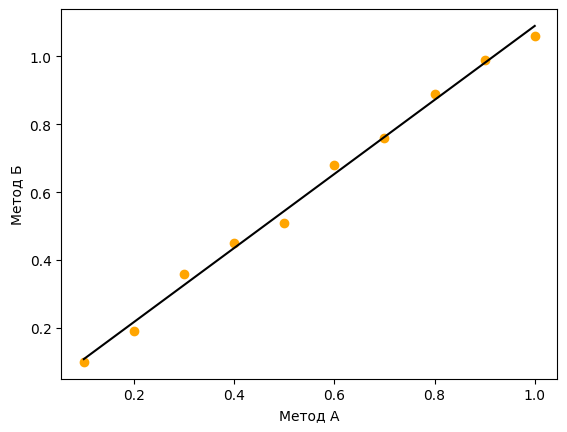

In [21]:
x = df2['Метод A']
y = df2['Метод B']
z = np.polyfit(x, y, 1)
linear_equation = np.poly1d(z)
print(linear_equation)
plt.scatter(x, y, color = 'orange')
plt.plot(x, linear_equation(x), color = 'black')
plt.xlabel('Метод А')
plt.ylabel('Метод Б')

In [22]:
A = x.values.reshape(-1,1)
B = y.values

In [23]:
model = LinearRegression()
model.fit(A,B)
R2 = r2_score(B, model.predict(A))
print(model.coef_)
print(model.intercept_)
print(R2)

[1.09030303]
-0.0006666666666667043
0.9945619322349641


`coef_` - это линейная составляющая отклонения <br>
`intercept_` - это систематическое отклонение

In [31]:
residuals = B - model.predict(A)
print(residuals)

[-0.00836364 -0.02739394  0.03357576  0.01454545 -0.03448485  0.02648485
 -0.00254545  0.01842424  0.00939394 -0.02963636]


Нужно убедиться, что остатки не сильно разбросаны относительно нуля

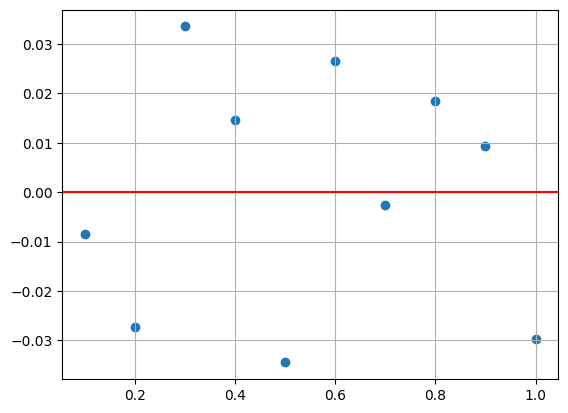

In [25]:
plt.scatter(A, residuals)
plt.axhline(y=0, color = 'red')
plt.grid()

In [26]:
def FTest(firstSample, secondSample):
    firstSample = np.array(firstSample)
    secondSample = np.array(secondSample)
    f = np.var(firstSample, ddof=1) / np.var(secondSample, ddof=1)
    dfn = firstSample.size - 1
    dfd = secondSample.size - 1
    p = 1 - stats.f.cdf(f, dfn, dfd)
    return (f, p)

In [27]:
FTest(x, residuals)

(153.84832730560564, 9.086345120756789e-09)

Таким образом, систематическое отклонение можно считать равным нулю. А измерения получаются завышенными, так как **значение `coef_ > 1`**

Можно построить функцию, которая будет считать доверительные интервалы для коэффициентов регрессионной прямой

In [60]:
def interval_LinearRegression(residual, x, coef, intercept):
    k = 0
    for i in residual:
        i = i ** 2
        k += i
    s_var = k/(len(residual)-2) #нашли s^2
    k = 0
    for j in x:
        j = j ** 2
        k += j
    s_var_intercept = s_var * k/((len(residual) ** 2) * np.var(x, ddof = 0)) # s^2 для свободного члена
    s_var_coef = s_var/(len(residual)*np.var(x, ddof = 0)) # s^2 для коэффициента перед x
    #далее расчет доверительного интервала уровня 0,95 (уровня значимости альфа 0,05)
    quantile = stats.t.ppf(1-0.05/2, df = len(residual)-2)
    #двусторонние интервалы
    intercept_bottom = intercept - quantile*np.sqrt(s_var_intercept)
    intercept_top = intercept + quantile*np.sqrt(s_var_intercept)
    print('Границы доверительного интервала для свободного члена:', intercept_bottom, intercept_top)
    coef_bottom = coef - quantile*np.sqrt(s_var_coef)
    coef_top = coef + quantile*np.sqrt(s_var_coef)
    print('Границы доверительного интервала для линейного коэффициента:', coef_bottom, coef_top)

In [61]:
interval_LinearRegression(residuals, x, model.coef_, model.intercept_)

Границы доверительного интервала для свободного члена: -0.04145153490347109 0.04011820157013768
Границы доверительного интервала для линейного коэффициента: [1.02457226] [1.1560338]


Здесь видно, что "0" вошёл в доверительный интервал, а "1" - нет => **есть линейно изменяющаяся систематическая ошибка**

### Задание 3. Многомерная регрессия.

In [91]:
df3 = df_bad.iloc[21:, :3]

In [92]:
newHeader = df3.iloc[0]
df3 = df3[1:]
df3.columns = newHeader
df3 = df3.astype('float64')
df3

21,Примесь А,Примесь В,Аналитический сигнал
22,0.5,0.0,99.65
23,1.0,0.0,99.08
24,0.0,0.0,99.99
25,0.5,0.5,99.51
26,1.0,0.5,98.95
27,0.0,0.5,99.98
28,0.5,1.0,99.51
29,1.0,1.0,99.05
30,0.0,1.0,100.12


In [98]:
impurity = df3[['Примесь А', 'Примесь В']]

In [100]:
signal = df3['Аналитический сигнал']

In [101]:
model = LinearRegression()

In [103]:
model.fit(impurity, signal)

LinearRegression()

In [106]:
R2 = r2_score(y_true = signal, y_pred = model.predict(impurity))

In [108]:
print('Coefficients', model.coef_)
print('Intercept', model.intercept_)
print(R2)

Coefficients [-1.00333333 -0.01333333]
Intercept 100.04611111111112
0.9767990859048243


Проверка значимости влияния каждой примеси на сигнал:

In [119]:
stat, p1 = stats.pearsonr(df3['Примесь А'], signal)
stat, p2 = stats.pearsonr(df3['Примесь В'], signal)
print('p_value(А)=', p1,
     'p_value(B)=', p2)

p_value(А)= 5.733825829329118e-07 p_value(B)= 0.9732498971660861


**Примесь А оказывает наибольшее влияние** (сильно коррелирует с аналитическим сигналом).